In [1]:
# install infercnvpy in the anaconda powershell
!pip install infercnvpy

  Created wheel for gtfparse: filename=gtfparse-1.2.1-py3-none-any.whl size=11637 sha256=22fb250596470748cd78dfc707732b9e23d03f3aad81df04cafe1aab3c283668
  Stored in directory: c:\users\kko1\appdata\local\pip\cache\wheels\42\41\84\ad98464a56fd4a362456674f539ed7123205efa0bb432fe9bb
Successfully built gtfparse


In [2]:
#import infercnvpy as cnv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()


import matplotlib.pyplot as pl
from matplotlib import rcParams

/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.9.2 umap==0.5.6 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 pynndescent==0.5.13
scvelo==0.3.2  scanpy==1.9.8  anndata==0.9.2  loompy==3.0.7  numpy==1.24.4  scipy==1.10.1  matplotlib==3.7.5  sklearn==1.3.2  pandas==2.0.3  


In [3]:
import seaborn as sns

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [4]:
import scvelo as scv

In [5]:
import os
os.chdir('/mnt/d/KP/EKP_RKP')

In [6]:
adata= sc.read('Immune_cell_after_harmony_04-22-24.h5ad')
adata

AnnData object with n_obs × n_vars = 5140 × 16462
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'tissue_1', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'celltype'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'celltype_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_rank_fgsea', 'neighbors', 'pca', 'tissue_1_colors', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Add Scissor information in adata

# Scissor values were calculated in R
# This is done after 15_4_Scissor_DGAC...R

In [9]:
DGAC_32a = pd.read_csv('/mnt/d/KP/EKP_RKP/Scissor/Scissor_DGAC12_immune_a0.32.csv')
DGAC_32a

,Scissor_select
AAACCCACAACACACT-1-0,0
AAACCCACAGACTCTA-1-0,0
AAACGAACACAACGTT-1-0,0
AAACGAACAGACGATG-1-0,0
AAACGAAGTTTGGGTT-1-0,0
...,...
TTTGACTAGATCGGTG-1-1,0
TTTGACTGTTGTGGAG-1-1,0
TTTGATCGTGCGTGCT-1-1,0
TTTGGAGTCTATCCAT-1-1,0


In [10]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,type,leiden,batch,tissue_1,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt,n_counts,celltype
AAACCCACAACACACT-1-0,1224,1220,1482.800415,3.906282,0.263440,allograft,EKP,0,0,Immune,23.835543,1.607468,0.628129,0.042361,0.002634,1482.800415,M2_Macrophage
AAACCCACAGACTCTA-1-0,1280,1278,1615.358765,12.976051,0.803292,allograft,EKP,0,0,Immune,71.692551,4.438181,0.000000,0.000000,0.008033,1615.358765,M2_Macrophage
AAACGAACACAACGTT-1-0,1853,1852,1831.287720,20.704004,1.130571,allograft,EKP,2,0,Immune,73.607811,4.019456,2.079207,0.113538,0.011306,1831.287720,Macrophage
AAACGAACAGACGATG-1-0,1839,1838,1929.874512,0.728869,0.037768,allograft,EKP,1,0,Immune,74.001747,3.834537,0.000000,0.000000,0.000378,1929.874512,M1_Macrophage
AAACGAAGTTTGGGTT-1-0,1438,1437,1834.701172,11.139084,0.607133,allograft,EKP,0,0,Immune,104.808022,5.712539,0.000000,0.000000,0.006071,1834.701172,M2_Macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGATCGGTG-1-1,2571,2569,2239.192627,22.420515,1.001277,allograft,RKP,1,1,Immune,137.132645,6.124200,1.049196,0.046856,0.010013,2239.192627,M1_Macrophage
TTTGACTGTTGTGGAG-1-1,1243,1243,1468.334351,26.262447,1.788588,allograft,RKP,1,1,Immune,57.621696,3.924290,0.733939,0.049984,0.017886,1468.334351,M1_Macrophage
TTTGATCGTGCGTGCT-1-1,1629,1628,1980.749756,13.624981,0.687870,allograft,RKP,8,1,Immune,92.942139,4.692271,1.662777,0.083947,0.006879,1980.749756,Macrophage
TTTGGAGTCTATCCAT-1-1,2961,2959,2421.421875,15.085918,0.623019,allograft,RKP,1,1,Immune,150.707428,6.223923,1.764712,0.072879,0.006230,2421.421875,M1_Macrophage


In [11]:
#adata.obs['scissor_DGAC_01a'] = DGAC_01a['Scissor_select']
#adata.obs['scissor_DGAC_05a'] = DGAC_05a['Scissor_select']
adata.obs['scissor_DGAC_32a'] = DGAC_32a['Scissor_select']


In [12]:
#adata.obs.scissor_DGAC_01a = adata.obs.scissor_DGAC_01a.astype('category')
#adata.obs.scissor_DGAC_05a = adata.obs.scissor_DGAC_05a.astype('category')
adata.obs.scissor_DGAC_32a = adata.obs.scissor_DGAC_32a.astype('category')

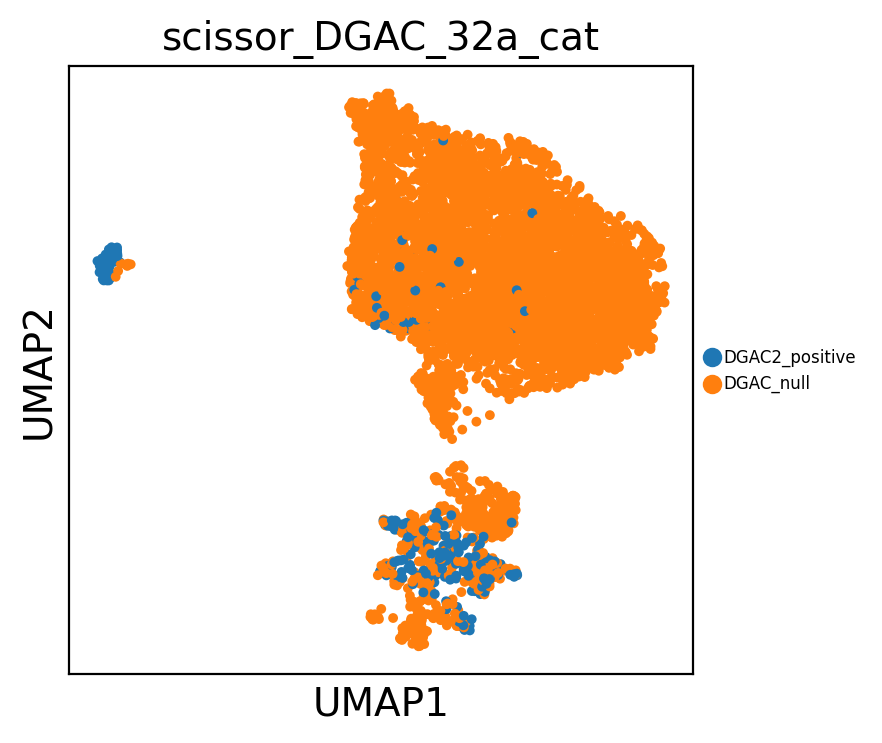

In [16]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'DGAC_null':[0],
              'DGAC1_positive': [1],
              'DGAC2_positive': [2],
             }

# Initialize empty column in cell metadata
adata.obs['scissor_DGAC_32a_cat'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.scissor_DGAC_32a).isin(cell_dict[i])
    adata.obs.loc[ind,'scissor_DGAC_32a_cat'] = i

sc.pl.umap(adata, color=['scissor_DGAC_32a_cat'], legend_loc='right margin', size=50, legend_fontsize=6)#, save='_RKP_by_celltype.pdf')


In [17]:
df = pd.crosstab(adata.obs['scissor_DGAC_01a_cat'], adata.obs['type'])
df

type,EKP,RKP
scissor_DGAC_01a_cat,,
DGAC1_positive,47,30
DGAC2_positive,1082,1021
DGAC_null,2352,608


In [18]:
df = pd.crosstab(adata.obs['scissor_DGAC_05a_cat'], adata.obs['type'])
df

type,EKP,RKP
scissor_DGAC_05a_cat,,
DGAC1_positive,0,1
DGAC2_positive,393,660
DGAC_null,3088,998


In [19]:
df = pd.crosstab(adata.obs['scissor_DGAC_32a_cat'], adata.obs['type'])
df

type,EKP,RKP
scissor_DGAC_32a_cat,,
DGAC2_positive,40,252
DGAC_null,3441,1407


In [20]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,type,leiden,batch,tissue_1,...,pct_counts_hb,percent_mt,n_counts,celltype,scissor_DGAC_01a,scissor_DGAC_05a,scissor_DGAC_32a,scissor_DGAC_01a_cat,scissor_DGAC_05a_cat,scissor_DGAC_32a_cat
AAACCCACAACACACT-1-0,1224,1220,1482.800415,3.906282,0.263440,allograft,EKP,0,0,Immune,...,0.042361,0.002634,1482.800415,M2_Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
AAACCCACAGACTCTA-1-0,1280,1278,1615.358765,12.976051,0.803292,allograft,EKP,0,0,Immune,...,0.000000,0.008033,1615.358765,M2_Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
AAACGAACACAACGTT-1-0,1853,1852,1831.287720,20.704004,1.130571,allograft,EKP,2,0,Immune,...,0.113538,0.011306,1831.287720,Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
AAACGAACAGACGATG-1-0,1839,1838,1929.874512,0.728869,0.037768,allograft,EKP,1,0,Immune,...,0.000000,0.000378,1929.874512,M1_Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
AAACGAAGTTTGGGTT-1-0,1438,1437,1834.701172,11.139084,0.607133,allograft,EKP,0,0,Immune,...,0.000000,0.006071,1834.701172,M2_Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGATCGGTG-1-1,2571,2569,2239.192627,22.420515,1.001277,allograft,RKP,1,1,Immune,...,0.046856,0.010013,2239.192627,M1_Macrophage,2,2,0,DGAC2_positive,DGAC2_positive,DGAC_null
TTTGACTGTTGTGGAG-1-1,1243,1243,1468.334351,26.262447,1.788588,allograft,RKP,1,1,Immune,...,0.049984,0.017886,1468.334351,M1_Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
TTTGATCGTGCGTGCT-1-1,1629,1628,1980.749756,13.624981,0.687870,allograft,RKP,8,1,Immune,...,0.083947,0.006879,1980.749756,Macrophage,0,0,0,DGAC_null,DGAC_null,DGAC_null
TTTGGAGTCTATCCAT-1-1,2961,2959,2421.421875,15.085918,0.623019,allograft,RKP,1,1,Immune,...,0.072879,0.006230,2421.421875,M1_Macrophage,2,2,0,DGAC2_positive,DGAC2_positive,DGAC_null


In [ ]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['scissor_DGAC_32a_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#fd1ad5","#988e96"], save='_scissor_DGAC_a32_in_EKP_immune.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['scissor_DGAC_32a_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#fd1ad5","#988e96"], save='_scissor_DGAC_a32_in_RKP_immune.pdf')